# Basic MLP (TensorFlow / Keras)

In [1]:
%pylab inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Populating the interactive namespace from numpy and matplotlib


In [2]:
data=loadtxt('4cl_01.dat')
y_train, x_train = data[:,0].astype(uint8), data[:,1:]

In [3]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=uint8)

In [4]:
min1, min2 = min(x_train[:,0]), min(x_train[:,1])
x_train-=[min1,min2]
max1, max2 = max(x_train[:,0]), max(x_train[:,1])
x_train/=[max1,max2]

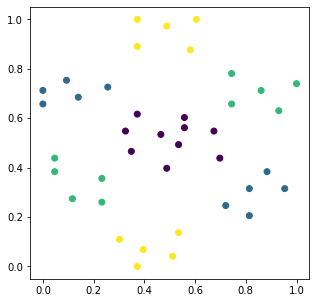

In [5]:
figsize(5,5)
scatter(x_train[:,0], x_train[:,1], c=y_train)

In [6]:
model = keras.models.Sequential()
model.add(layers.Dense(10, input_shape=(2,), activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                30        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 44        
Total params: 184
Trainable params: 184
Non-trainable params: 0
_________________________________________________________________


In [8]:
opt = keras.optimizers.RMSprop(learning_rate=0.02)

In [9]:
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.fit(x_train, y_train, epochs=200, verbose=0)

In [11]:
model.evaluate(x_train, y_train)

2/2 [==============================] - 0s 34ms/step - loss: 0.1356 - accuracy: 1.0000


[0.1356389820575714, 1.0]

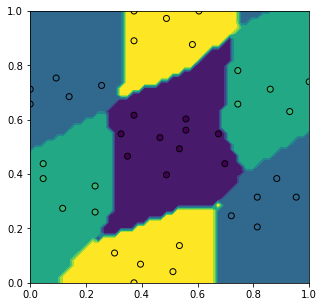

In [12]:
n=50 # rozdzielczość
x = y = linspace(0,1,num=n)
bb=ones((n,n))
xx, yy = np.meshgrid(x, y)
z=argmax(model.predict(transpose([yy,xx])), axis=2)
figsize(5,5)
contourf(xx,yy,z, vmin=0, vmax=max(y_train));
scatter(x_train[:,0], x_train[:,1],c=y_train.astype('int'), edgecolors=(0,0,0))